In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [36]:
data = pd.read_excel(r"fraud_data.xlsx")
data

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,9,0,Current,3/1/2018,Morning,0
1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,10,0,Savings,5/1/2018,Morning,0
2,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,2,0,Current,7/1/2018,Morning,1
3,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,1,0,Current,6/1/2018,Afternoon,1
4,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,17,0,Current,6/1/2018,Morning,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,PAYMENT,Cuba,337.50,C1494306005,33107.0,32769.50,M1424027000,7,0,Current,3/1/2018,Afternoon,0
10121,PAYMENT,Mexico,5003.57,C1633890169,32769.5,27765.93,M1854745805,11,0,Savings,5/1/2018,Morning,0
10122,PAYMENT,Panama,10424.89,C1026138669,50780.0,40355.11,M1852900317,6,0,Savings,7/1/2018,Night,0
10123,PAYMENT,Mexico,2823.59,C378659213,986.0,0.00,M301812950,12,0,Savings,6/1/2018,Night,0


In [37]:
data.shape

(10125, 13)

In [38]:
pd.set_option('display.max_columns',None)
data.describe(include='all')

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
count,10125,10125,1.012500e+04,10125,1.012500e+04,1.012500e+04,10125,10125.000000,10125.0,10125,10125,10125,10125.000000
unique,5,135,NaN,10119,NaN,NaN,6494,NaN,NaN,2,14,3,NaN
top,PAYMENT,Estados Unidos,NaN,C10001825,NaN,NaN,C985934102,NaN,NaN,Savings,6/1/2018,Afternoon,NaN
freq,5544,1282,NaN,7,NaN,NaN,68,NaN,NaN,6995,1453,3628,NaN
mean,NaN,NaN,1.048873e+05,NaN,8.836949e+05,9.046314e+05,NaN,10.513580,0.0,NaN,NaN,NaN,0.011654
std,NaN,NaN,2.706366e+05,NaN,2.124555e+06,2.170130e+06,NaN,5.809393,0.0,NaN,NaN,NaN,0.107330
min,NaN,NaN,2.390000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000,0.0,NaN,NaN,NaN,0.000000
25%,NaN,NaN,4.397580e+03,NaN,1.290000e+02,0.000000e+00,NaN,6.000000,0.0,NaN,NaN,NaN,0.000000
50%,NaN,NaN,1.279882e+04,NaN,2.136300e+04,1.019179e+04,NaN,10.000000,0.0,NaN,NaN,NaN,0.000000
75%,NaN,NaN,1.143818e+05,NaN,1.724320e+05,1.707442e+05,NaN,16.000000,0.0,NaN,NaN,NaN,0.000000


In [39]:
data.drop(columns=['branch','nameOrig','nameDest'],inplace=True)
data

,type,amount,oldbalanceOrg,newbalanceOrig,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,9,0,Current,3/1/2018,Morning,0
1,PAYMENT,1864.28,21249.0,19384.72,10,0,Savings,5/1/2018,Morning,0
2,TRANSFER,181.00,181.0,0.00,2,0,Current,7/1/2018,Morning,1
3,CASH_OUT,181.00,181.0,0.00,1,0,Current,6/1/2018,Afternoon,1
4,PAYMENT,11668.14,41554.0,29885.86,17,0,Current,6/1/2018,Morning,0
...,...,...,...,...,...,...,...,...,...,...
10120,PAYMENT,337.50,33107.0,32769.50,7,0,Current,3/1/2018,Afternoon,0
10121,PAYMENT,5003.57,32769.5,27765.93,11,0,Savings,5/1/2018,Morning,0
10122,PAYMENT,10424.89,50780.0,40355.11,6,0,Savings,7/1/2018,Night,0
10123,PAYMENT,2823.59,986.0,0.00,12,0,Savings,6/1/2018,Night,0


In [40]:
import pandas as pd


data['Date of transaction'] = pd.to_datetime(data['Date of transaction'], dayfirst=True)
print(data['Date of transaction'].head())
print(data['Date of transaction'].dtypes)


0   2018-01-03
1   2018-01-05
2   2018-01-07
3   2018-01-06
4   2018-01-06
Name: Date of transaction, dtype: datetime64[ns]
datetime64[ns]


In [41]:

data['transaction_year'] = data['Date of transaction'].dt.year
data['transaction_month'] = data['Date of transaction'].dt.month
data['transaction_day'] = data['Date of transaction'].dt.day


data[['Date of transaction', 'transaction_year', 'transaction_month', 'transaction_day']].head()


,Date of transaction,transaction_year,transaction_month,transaction_day
0,2018-01-03,2018,1,3
1,2018-01-05,2018,1,5
2,2018-01-07,2018,1,7
3,2018-01-06,2018,1,6
4,2018-01-06,2018,1,6


In [42]:

data.drop(columns=['Date of transaction'], inplace=True)


data.head()


,type,amount,oldbalanceOrg,newbalanceOrig,unusuallogin,isFlaggedFraud,Acct type,Time of day,isFraud,transaction_year,transaction_month,transaction_day
0,PAYMENT,9839.64,170136.0,160296.36,9,0,Current,Morning,0,2018,1,3
1,PAYMENT,1864.28,21249.0,19384.72,10,0,Savings,Morning,0,2018,1,5
2,TRANSFER,181.00,181.0,0.00,2,0,Current,Morning,1,2018,1,7
3,CASH_OUT,181.00,181.0,0.00,1,0,Current,Afternoon,1,2018,1,6
4,PAYMENT,11668.14,41554.0,29885.86,17,0,Current,Morning,0,2018,1,6


In [43]:
 data.isnull().sum()


type                 0
amount               0
oldbalanceOrg        0
newbalanceOrig       0
unusuallogin         0
isFlaggedFraud       0
Acct type            0
Time of day          0
isFraud              0
transaction_year     0
transaction_month    0
transaction_day      0
dtype: int64

In [68]:
new_data = data.copy()

from sklearn.preprocessing import LabelEncoder

encoders = {}
for i in new_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    new_data[i] = le.fit_transform(new_data[i])
    encoders[i] = le

new_data

,type,amount,oldbalanceOrg,newbalanceOrig,unusuallogin,isFlaggedFraud,Acct type,Time of day,isFraud,transaction_year,transaction_month,transaction_day
0,3,9839.64,170136.0,160296.36,9,0,0,1,0,2018,1,3
1,3,1864.28,21249.0,19384.72,10,0,1,1,0,2018,1,5
2,4,181.00,181.0,0.00,2,0,0,1,1,2018,1,7
3,1,181.00,181.0,0.00,1,0,0,0,1,2018,1,6
4,3,11668.14,41554.0,29885.86,17,0,0,1,0,2018,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
10120,3,337.50,33107.0,32769.50,7,0,0,0,0,2018,1,3
10121,3,5003.57,32769.5,27765.93,11,0,1,1,0,2018,1,5
10122,3,10424.89,50780.0,40355.11,6,0,1,2,0,2018,1,7
10123,3,2823.59,986.0,0.00,12,0,1,2,0,2018,1,6


In [69]:
encoders

{'type': LabelEncoder(),
 'Acct type': LabelEncoder(),
 'Time of day': LabelEncoder()}

In [48]:
new_data.isnull().sum()

type                 0
amount               0
oldbalanceOrg        0
newbalanceOrig       0
unusuallogin         0
isFlaggedFraud       0
Acct type            0
Time of day          0
isFraud              0
transaction_year     0
transaction_month    0
transaction_day      0
dtype: int64

In [46]:
inputs = new_data.drop('isFraud', axis=1)
output = new_data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [111]:
data.dtypes

type                  object
amount               float64
oldbalanceOrg        float64
newbalanceOrig       float64
unusuallogin           int64
isFlaggedFraud         int64
Acct type             object
Time of day           object
isFraud                int64
transaction_year       int32
transaction_month      int32
transaction_day        int64
dtype: object

In [112]:
inputs_cat = data.drop('isFraud', axis=1)
outputs_cat = data['isFraud']

columns_to_fill = ['type','Acct type','Time of day']

inputs_cat[columns_to_fill] = inputs_cat[columns_to_fill].fillna('Missing Value')

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(inputs_cat, outputs_cat, test_size=0.3, random_state=42)

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    try:
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_prob_train = model.predict_proba(X_train)[:, 1]

        roc_prob_train = roc_auc_score(y_train, y_prob_train)
        gini_prob_train = roc_prob_train * 2 - 1
        confusion_matrix_result_train = confusion_matrix(y_train, y_pred_train)
        classification_report_result_train = classification_report(y_train, y_pred_train)

        print(f'Model Performance for {model_name}')
        print('Train Gini prob is', gini_prob_train * 100)
        print(classification_report_result_train)
        print(confusion_matrix_result_train)

        y_pred_test = model.predict(X_test)
        y_prob_test = model.predict_proba(X_test)[:, 1]

        roc_prob_test = roc_auc_score(y_test, y_prob_test)
        gini_prob_test = roc_prob_test * 2 - 1
        confusion_matrix_result_test = confusion_matrix(y_test, y_pred_test)
        classification_report_result_test = classification_report(y_test, y_pred_test)

        print(f'Model Performance for {model_name}')
        print('Test Gini prob is', gini_prob_test * 100)
        print(classification_report_result_test)
        print(confusion_matrix_result_test)

        return [gini_prob_train, gini_prob_test]

    except Exception as e:
        print(f"An error occurred while evaluating the model {model_name}: {e}")
        return None


In [114]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

In [115]:

models = []

xgb_model_def = XGBClassifier(random_state=42)
lgb_model_def = LGBMClassifier(random_state=42)
catboost_model_def = CatBoostClassifier(random_state=42)
catboost_model_custom = CatBoostClassifier(cat_features=['type','Acct type','Time of day'], random_state=42)
rf_model_def = RandomForestClassifier(random_state=42)
models.extend([
    ('XGBoost', xgb_model_def),
    ('LightGBM', lgb_model_def),
    ('CatBoost', catboost_model_def),
    ('CatBoost_Custom', catboost_model_custom),
    ('Random Forest', rf_model_def)
])

In [116]:
gini_df = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models:
    if model_name == 'CatBoost_Custom':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)

    if gini_prob is not None:
        gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted = gini_df.sort_values(by='Test Gini', ascending=False)

gini_df_sorted

Model Performance for XGBoost
Train Gini prob is 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7008
           1       1.00      1.00      1.00        79

    accuracy                           1.00      7087
   macro avg       1.00      1.00      1.00      7087
weighted avg       1.00      1.00      1.00      7087

[[7008    0]
 [   0   79]]
Model Performance for XGBoost
Test Gini prob is 67.61826591769906
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2999
           1       1.00      0.36      0.53        39

    accuracy                           0.99      3038
   macro avg       1.00      0.68      0.76      3038
weighted avg       0.99      0.99      0.99      3038

[[2999    0]
 [  25   14]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 79, number of negative: 7008
[LightGBM] [Info] Auto-c

C:\Users\Hpvictus1\AppData\Local\Temp\ipykernel_8236\390598664.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)


Model Performance for LightGBM
Train Gini prob is 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7008
           1       1.00      1.00      1.00        79

    accuracy                           1.00      7087
   macro avg       1.00      1.00      1.00      7087
weighted avg       1.00      1.00      1.00      7087

[[7008    0]
 [   0   79]]
Model Performance for LightGBM
Test Gini prob is 67.9140910217936
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2999
           1       1.00      0.36      0.53        39

    accuracy                           0.99      3038
   macro avg       1.00      0.68      0.76      3038
weighted avg       0.99      0.99      0.99      3038

[[2999    0]
 [  25   14]]
Learning rate set to 0.023773
0:	learn: 0.6404523	total: 6.26ms	remaining: 6.25s
1:	learn: 0.5922905	total: 9.96ms	remaining: 4.97s
2:	learn: 0.5455953	total: 15.1ms	rema

,Model,Train Gini,Test Gini
1,LightGBM,1.000000,0.679141
4,Random Forest,1.000000,0.677431
0,XGBoost,1.000000,0.676183
3,CatBoost_Custom,0.963828,0.590949
2,CatBoost,0.993794,0.579484


In [117]:
gini_df_sorted

,Model,Train Gini,Test Gini
1,LightGBM,1.000000,0.679141
4,Random Forest,1.000000,0.677431
0,XGBoost,1.000000,0.676183
3,CatBoost_Custom,0.963828,0.590949
2,CatBoost,0.993794,0.579484


In [120]:
from sklearn.model_selection import cross_val_score
import optuna

def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_features': trial.suggest_categorical('max_features',('log2', 'sqrt')),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 10, 100)
    }

    rf_clf = RandomForestClassifier(**param)

    auc = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=5)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_rf_model = RandomForestClassifier(**best_params)

[I 2025-09-06 12:39:21,234] A new study created in memory with name: no-name-1203cfc7-bdef-414c-b2ed-cd0dde48da2a
[I 2025-09-06 12:39:29,611] Trial 0 finished with value: 0.7827277576136024 and parameters: {'n_estimators': 602, 'max_features': 'log2', 'max_depth': 3, 'min_samples_leaf': 79}. Best is trial 0 with value: 0.7827277576136024.
[I 2025-09-06 12:39:41,386] Trial 1 finished with value: 0.7729487423408656 and parameters: {'n_estimators': 864, 'max_features': 'sqrt', 'max_depth': 6, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.7827277576136024.
[I 2025-09-06 12:39:50,322] Trial 2 finished with value: 0.7856848989839857 and parameters: {'n_estimators': 684, 'max_features': 'sqrt', 'max_depth': 4, 'min_samples_leaf': 83}. Best is trial 2 with value: 0.7856848989839857.
[I 2025-09-06 12:39:54,751] Trial 3 finished with value: 0.776167489495115 and parameters: {'n_estimators': 586, 'max_features': 'sqrt', 'max_depth': 10, 'min_samples_leaf': 42}. Best is trial 2 with value

Best trial:
  Value: 0.786
  Params:  {'n_estimators': 684, 'max_features': 'sqrt', 'max_depth': 4, 'min_samples_leaf': 83}


In [121]:
from sklearn.model_selection import cross_val_score
import optuna

def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100)
    }

    lgb_clf = LGBMClassifier(**param)

    auc = cross_val_score(lgb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=5)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgb_model = LGBMClassifier(**best_params)

[I 2025-09-06 12:40:38,407] A new study created in memory with name: no-name-a1b080e1-8e34-48c0-8766-464d14f3f38a
C:\Users\Hpvictus1\AppData\Local\Temp\ipykernel_8236\4003166677.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2025-09-06 12:40:53,826] Trial 0 finished with value: 0.7437537807828903 and parameters: {'n_estimators': 356, 'learning_rate': 0.04873369880359551, 'max_depth': 9, 'num_leaves': 98}. Best is trial 0 with value: 0.7437537807828903.
C:\Users\Hpvictus1\AppData\Local\Temp\ipykernel_8236\4003166677.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.sug

Best trial:
  Value: 0.749
  Params:  {'n_estimators': 66, 'learning_rate': 0.08470368671792508, 'max_depth': 5, 'num_leaves': 10}


In [73]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
         
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        
        'gamma': trial.suggest_int('gamma', 0, 10)
    }

    xgb_clf = XGBClassifier(**param)
    auc = cross_val_score(xgb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBClassifier(**best_params)

[I 2025-09-06 11:51:50,898] A new study created in memory with name: no-name-b5818e3f-5582-457c-8847-e670c0d7fcbd
[I 2025-09-06 11:51:52,642] Trial 0 finished with value: 0.8019925742171746 and parameters: {'n_estimators': 397, 'learning_rate': 0.01245341326447061, 'max_depth': 4, 'subsample': 0.6388543610913726, 'colsample_bytree': 0.6466654289520477, 'gamma': 5}. Best is trial 0 with value: 0.8019925742171746.
[I 2025-09-06 11:51:54,147] Trial 1 finished with value: 0.7786502035931261 and parameters: {'n_estimators': 660, 'learning_rate': 0.07524221865443838, 'max_depth': 8, 'subsample': 0.99026642947175, 'colsample_bytree': 0.6813132269391449, 'gamma': 10}. Best is trial 0 with value: 0.8019925742171746.
[I 2025-09-06 11:51:55,193] Trial 2 finished with value: 0.732259794260365 and parameters: {'n_estimators': 36, 'learning_rate': 0.6142259155074361, 'max_depth': 4, 'subsample': 0.5100604882712854, 'colsample_bytree': 0.8629520320149427, 'gamma': 8}. Best is trial 0 with value: 0.80

Best trial:
  Value: 0.802
  Params:  {'n_estimators': 654, 'learning_rate': 0.03509020182809491, 'max_depth': 4, 'subsample': 0.6376746245785472, 'colsample_bytree': 0.6145840002056562, 'gamma': 5}


In [122]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        # 'cat_features': [],  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostClassifier(**best_params)

[I 2025-09-06 12:41:37,304] A new study created in memory with name: no-name-32c82f6d-71dd-4b8c-b23e-6004da4f5e64
C:\Users\Hpvictus1\AppData\Local\Temp\ipykernel_8236\1299305732.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Hpvictus1\AppData\Local\Temp\ipykernel_8236\1299305732.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
[I 2025-09-06 12:41:44,016] Trial 0 finished with value: 0.7619287765549182 and parameters: {'iterations': 607

Best trial:
  Value: 0.762
  Params:  {'iterations': 607, 'learning_rate': 0.6111925553115812, 'depth': 6, 'l2_leaf_reg': 0.30483221564974766, 'loss_function': 'Logloss'}


In [123]:
models_optimized = []

models_optimized.extend([
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgb_model),
    ('CatBoost Optuna', best_cb_model),
    ('Random Forest Optuna',best_rf_model)
])

In [124]:
gini_df_optuna = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models_optimized:
    gini_prob = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
    if gini_prob is not None:
        gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted_optuna = gini_df_optuna.sort_values(by='Test Gini', ascending=False)

gini_df_sorted_optuna


Model Performance for XGBoost Optuna
Train Gini prob is 75.20573232761112
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7008
           1       1.00      0.15      0.26        79

    accuracy                           0.99      7087
   macro avg       1.00      0.58      0.63      7087
weighted avg       0.99      0.99      0.99      7087

[[7008    0]
 [  67   12]]
Model Performance for XGBoost Optuna
Test Gini prob is 62.390882430895765
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2999
           1       1.00      0.10      0.19        39

    accuracy                           0.99      3038
   macro avg       0.99      0.55      0.59      3038
weighted avg       0.99      0.99      0.98      3038

[[2999    0]
 [  35    4]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 79, number of negative: 70

C:\Users\Hpvictus1\AppData\Local\Temp\ipykernel_8236\2609667454.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)


Model Performance for LightGBM Optuna
Train Gini prob is 98.99102653025835
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7008
           1       1.00      0.44      0.61        79

    accuracy                           0.99      7087
   macro avg       1.00      0.72      0.81      7087
weighted avg       0.99      0.99      0.99      7087

[[7008    0]
 [  44   35]]
Model Performance for LightGBM Optuna
Test Gini prob is 64.96011491009823
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2999
           1       1.00      0.21      0.34        39

    accuracy                           0.99      3038
   macro avg       0.99      0.60      0.67      3038
weighted avg       0.99      0.99      0.99      3038

[[2999    0]
 [  31    8]]
0:	learn: 0.0767566	total: 8.57ms	remaining: 5.2s
1:	learn: 0.0481711	total: 16.7ms	remaining: 5.06s
2:	learn: 0.0382736	total: 23ms	remaining:

C:\Users\Hpvictus1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hpvictus1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hpvictus1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Performance for Random Forest Optuna
Train Gini prob is 76.30989538176985
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7008
           1       0.00      0.00      0.00        79

    accuracy                           0.99      7087
   macro avg       0.49      0.50      0.50      7087
weighted avg       0.98      0.99      0.98      7087

[[7008    0]
 [  79    0]]
Model Performance for Random Forest Optuna
Test Gini prob is 60.66381101392773
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2999
           1       0.00      0.00      0.00        39

    accuracy                           0.99      3038
   macro avg       0.49      0.50      0.50      3038
weighted avg       0.97      0.99      0.98      3038

[[2999    0]
 [  39    0]]


C:\Users\Hpvictus1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hpvictus1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hpvictus1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Train Gini,Test Gini
1,LightGBM Optuna,0.989910,0.649601
0,XGBoost Optuna,0.752057,0.623909
3,Random Forest Optuna,0.763099,0.606638
2,CatBoost Optuna,1.000000,0.559186


In [125]:
final_review = pd.concat([gini_df_sorted,gini_df_sorted_optuna], axis=0)

final_review_sorted = final_review.sort_values(by='Test Gini', ascending=False)
final_review_sorted.reset_index(drop=True, inplace=True)

final_review_sorted

,Model,Train Gini,Test Gini
0,LightGBM,1.000000,0.679141
1,Random Forest,1.000000,0.677431
2,XGBoost,1.000000,0.676183
3,LightGBM Optuna,0.989910,0.649601
4,XGBoost Optuna,0.752057,0.623909
5,Random Forest Optuna,0.763099,0.606638
6,CatBoost_Custom,0.963828,0.590949
7,CatBoost,0.993794,0.579484
8,CatBoost Optuna,1.000000,0.559186


In [126]:
final_review_sorted['Gini_gap'] = (final_review_sorted['Train Gini'] - final_review_sorted['Test Gini']).abs()

final_review_sorted = final_review_sorted.sort_values(
    by=['Test Gini', 'Gini_gap'],
    ascending=[False, True]
).reset_index(drop=True)

final_review_sorted

,Model,Train Gini,Test Gini,Gini_gap
0,LightGBM,1.000000,0.679141,0.320859
1,Random Forest,1.000000,0.677431,0.322569
2,XGBoost,1.000000,0.676183,0.323817
3,LightGBM Optuna,0.989910,0.649601,0.340309
4,XGBoost Optuna,0.752057,0.623909,0.128148
5,Random Forest Optuna,0.763099,0.606638,0.156461
6,CatBoost_Custom,0.963828,0.590949,0.372879
7,CatBoost,0.993794,0.579484,0.414310
8,CatBoost Optuna,1.000000,0.559186,0.440814


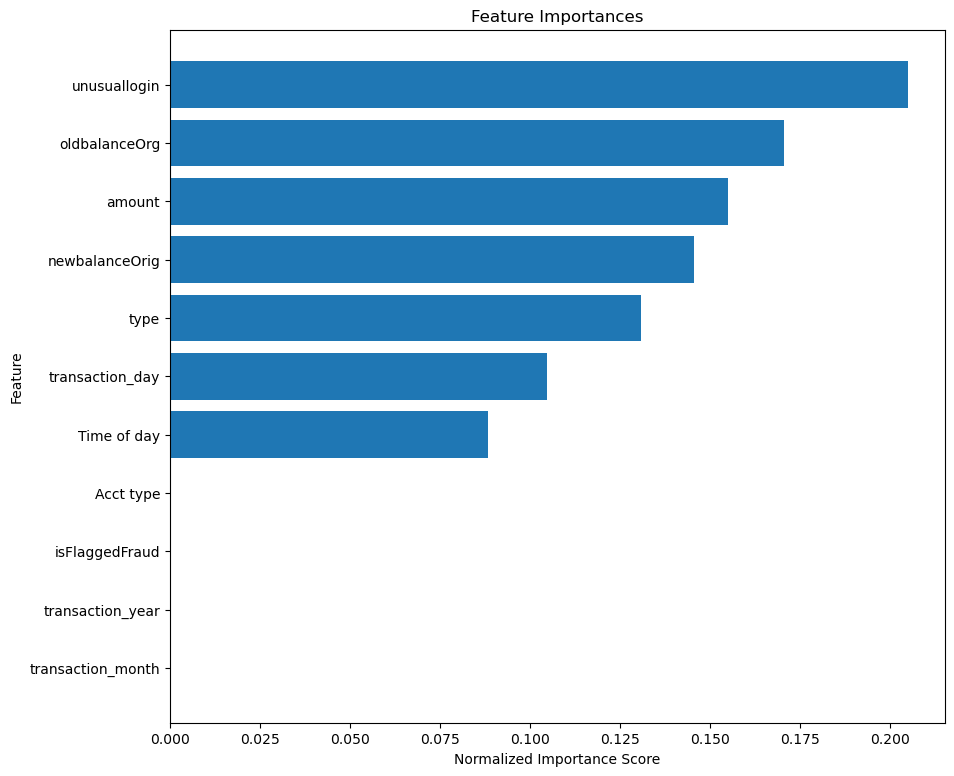

In [127]:
import matplotlib.pyplot as plt

importances = best_xgb_model.feature_importances_


importances = importances / importances.sum()

importance_df = pd.DataFrame({
        'Feature':  X_train.columns,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 9))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importances")
plt.xlabel("Normalized Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

In [128]:
importance_df

,Feature,Importance
4,unusuallogin,0.204919
2,oldbalanceOrg,0.170625
1,amount,0.154855
3,newbalanceOrig,0.145544
0,type,0.130813
10,transaction_day,0.104798
7,Time of day,0.088446
6,Acct type,0.000000
5,isFlaggedFraud,0.000000
8,transaction_year,0.000000


In [129]:

important_features_df = importance_df[importance_df['Importance'] > 0.01]

print("Features with Importance > 1%:")
important_features_df

Features with Importance > 1%:


,Feature,Importance
4,unusuallogin,0.204919
2,oldbalanceOrg,0.170625
1,amount,0.154855
3,newbalanceOrig,0.145544
0,type,0.130813
10,transaction_day,0.104798
7,Time of day,0.088446


In [130]:
important_features_df.Feature.tolist()

['unusuallogin',
 'oldbalanceOrg',
 'amount',
 'newbalanceOrig',
 'type',
 'transaction_day',
 'Time of day']

SHAP Values Summary (Selected Features)


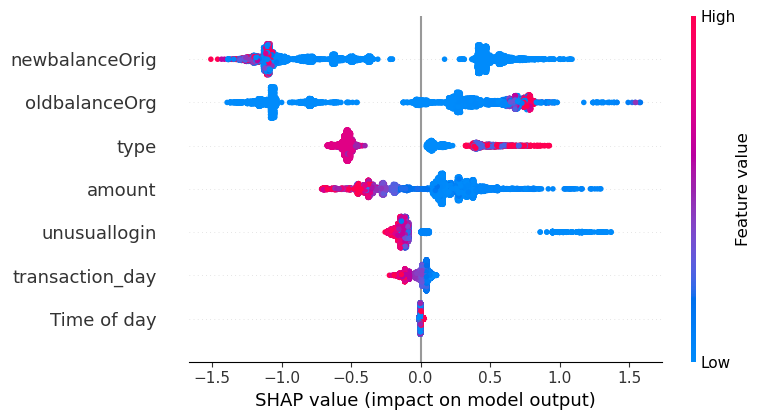

In [136]:
import shap

selected_features = [
    'unusuallogin',
 'oldbalanceOrg',
 'amount',
 'newbalanceOrig',
 'type',
 'transaction_day',
 'Time of day'
]


explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_train)


shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_selected = shap_df[selected_features]
X_selected = X_train[selected_features]


print("SHAP Values Summary (Selected Features)")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_selected.values, X_selected, show=False)
plt.tight_layout()
plt.show()

In [132]:
new_inputs = important_features_df['Feature'].tolist()

new_inputs

['unusuallogin',
 'oldbalanceOrg',
 'amount',
 'newbalanceOrig',
 'type',
 'transaction_day',
 'Time of day']

In [137]:
fin_input = new_data[['unusuallogin',
 'oldbalanceOrg',
 'amount',
 'newbalanceOrig',
 'type']]
fin_output = data['isFraud']

X_train_fin, X_test_fin, y_train_fin, y_test_fin = train_test_split(fin_input, fin_output, test_size=0.3, random_state=42)

In [139]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
         
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        
        'gamma': trial.suggest_int('gamma', 0, 10)
    }

    xgb_clf = XGBClassifier(**param)
    auc = cross_val_score(xgb_clf, X_train_fin, y_train_fin, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model_fin = XGBClassifier(**best_params)

[I 2025-09-06 12:53:46,038] A new study created in memory with name: no-name-ee42cf60-abc8-44ce-910f-168f0e28106a
[I 2025-09-06 12:53:50,041] Trial 0 finished with value: 0.7973213763025407 and parameters: {'n_estimators': 747, 'learning_rate': 0.1887144023454162, 'max_depth': 6, 'subsample': 0.6279671010962184, 'colsample_bytree': 0.7563313779888958, 'gamma': 5}. Best is trial 0 with value: 0.7973213763025407.
[I 2025-09-06 12:53:51,684] Trial 1 finished with value: 0.7921382481884766 and parameters: {'n_estimators': 788, 'learning_rate': 0.021159514008733834, 'max_depth': 8, 'subsample': 0.9723529003222846, 'colsample_bytree': 0.5991358254876502, 'gamma': 6}. Best is trial 0 with value: 0.7973213763025407.
[I 2025-09-06 12:53:53,223] Trial 2 finished with value: 0.7928523283118031 and parameters: {'n_estimators': 14, 'learning_rate': 0.027614601670332663, 'max_depth': 9, 'subsample': 0.8559299283733054, 'colsample_bytree': 0.8151896383084591, 'gamma': 0}. Best is trial 0 with value: 

Best trial:
  Value: 0.803
  Params:  {'n_estimators': 870, 'learning_rate': 0.040056621863820606, 'max_depth': 3, 'subsample': 0.9181158855806255, 'colsample_bytree': 0.5387281413754258, 'gamma': 3}


In [146]:
train_and_evaluate_model('XGB opitimized for selected features', best_xgb_model_fin, X_train_fin, y_train_fin, X_test_fin, y_test_fin)

Model Performance for XGB opitimized for selected features
Train Gini prob is 75.81570429454945
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7008
           1       1.00      0.15      0.26        79

    accuracy                           0.99      7087
   macro avg       1.00      0.58      0.63      7087
weighted avg       0.99      0.99      0.99      7087

[[7008    0]
 [  67   12]]
Model Performance for XGB opitimized for selected features
Test Gini prob is 61.280255811766324
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2999
           1       1.00      0.08      0.14        39

    accuracy                           0.99      3038
   macro avg       0.99      0.54      0.57      3038
weighted avg       0.99      0.99      0.98      3038

[[2999    0]
 [  36    3]]


[np.float64(0.7581570429454945), np.float64(0.6128025581176633)]

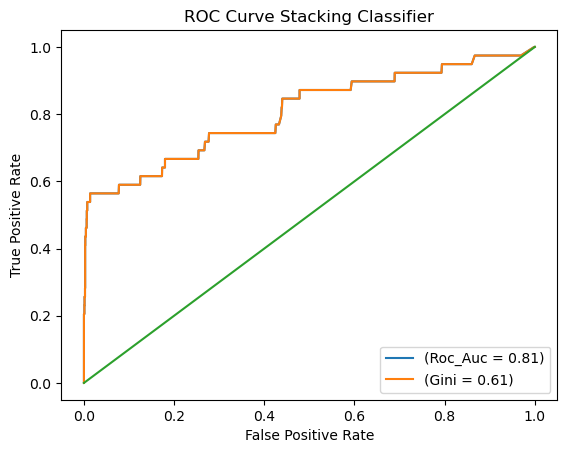

In [147]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob_fin =best_xgb_model_fin.predict_proba(X_test_fin)[:,1]

roc_auc = roc_auc_score(y_test_fin, y_prob_fin)
gini = (2*roc_auc_score(y_test_fin, y_prob_fin))-1

fpr, tpr, thresholds = roc_curve(y_test_fin, y_prob_fin)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Stacking Classifier')

plt.legend(loc='lower right')
plt.show()

In [157]:
test = pd.read_excel('fraud_deploy_data.xlsx')

test

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,id
0,CASH_OUT,Irak,386683.04,C1373577787,0.00,0.00,C33524623,12,0,Savings,7/1/2018,Morning,1
1,PAYMENT,Estados Unidos,504.83,C49365994,608907.09,608402.27,M1529649769,8,0,Savings,13/1/2018,Afternoon,2
2,PAYMENT,Costa de Marfil,9805.46,C480184864,0.00,0.00,M1433956626,19,0,Savings,7/1/2018,Morning,3
3,CASH_OUT,Mexico,54395.20,C391915263,587.49,0.00,C1531333864,9,0,Current,6/1/2018,Afternoon,4
4,PAYMENT,Argelia,24258.10,C247576438,394.00,0.00,M775635860,7,0,Savings,11/1/2018,Night,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,CASH_IN,Mexico,235409.03,C1538844412,10500000.00,10700000.00,C1538745405,13,0,Savings,19/1/2018,Night,1008
1008,CASH_IN,Mexico,29351.64,C853343978,10000000.00,10100000.00,C187649742,20,0,Savings,6/1/2018,Afternoon,1009
1009,CASH_OUT,Turquia,363482.02,C1457226878,25365.85,0.00,C1899073220,7,0,Savings,13/1/2018,Afternoon,1010
1010,CASH_OUT,Alemania,31980.86,C1558129795,0.00,0.00,C257999182,13,0,Savings,7/1/2018,Morning,1011


In [158]:
X_train_fin.columns

Index(['unusuallogin', 'oldbalanceOrg', 'amount', 'newbalanceOrig', 'type'], dtype='object')

In [159]:
deploy_data = test[['unusuallogin', 'oldbalanceOrg', 'amount', 'newbalanceOrig', 'type']]

deploy_data.head()

,unusuallogin,oldbalanceOrg,amount,newbalanceOrig,type
0,12,0.00,386683.04,0.00,CASH_OUT
1,8,608907.09,504.83,608402.27,PAYMENT
2,19,0.00,9805.46,0.00,PAYMENT
3,9,587.49,54395.20,0.00,CASH_OUT
4,7,394.00,24258.10,0.00,PAYMENT


In [160]:
for i in ['type']:
    le = encoders[i]   # use the encoder fitted on training
    deploy_data[i] = le.transform(deploy_data[i])


deploy_data.head()

C:\Users\Hpvictus1\AppData\Local\Temp\ipykernel_8236\599973220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deploy_data[i] = le.transform(deploy_data[i])


,unusuallogin,oldbalanceOrg,amount,newbalanceOrig,type
0,12,0.00,386683.04,0.00,1
1,8,608907.09,504.83,608402.27,3
2,19,0.00,9805.46,0.00,3
3,9,587.49,54395.20,0.00,1
4,7,394.00,24258.10,0.00,3


In [162]:
test['prediction'] = best_xgb_model_fin.predict_proba(deploy_data)[:,1]

test

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,id,prediction
0,CASH_OUT,Irak,386683.04,C1373577787,0.00,0.00,C33524623,12,0,Savings,7/1/2018,Morning,1,0.004415
1,PAYMENT,Estados Unidos,504.83,C49365994,608907.09,608402.27,M1529649769,8,0,Savings,13/1/2018,Afternoon,2,0.004584
2,PAYMENT,Costa de Marfil,9805.46,C480184864,0.00,0.00,M1433956626,19,0,Savings,7/1/2018,Morning,3,0.002533
3,CASH_OUT,Mexico,54395.20,C391915263,587.49,0.00,C1531333864,9,0,Current,6/1/2018,Afternoon,4,0.019694
4,PAYMENT,Argelia,24258.10,C247576438,394.00,0.00,M775635860,7,0,Savings,11/1/2018,Night,5,0.006469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,CASH_IN,Mexico,235409.03,C1538844412,10500000.00,10700000.00,C1538745405,13,0,Savings,19/1/2018,Night,1008,0.004268
1008,CASH_IN,Mexico,29351.64,C853343978,10000000.00,10100000.00,C187649742,20,0,Savings,6/1/2018,Afternoon,1009,0.012656
1009,CASH_OUT,Turquia,363482.02,C1457226878,25365.85,0.00,C1899073220,7,0,Savings,13/1/2018,Afternoon,1010,0.026880
1010,CASH_OUT,Alemania,31980.86,C1558129795,0.00,0.00,C257999182,13,0,Savings,7/1/2018,Morning,1011,0.015505


In [166]:
frauds = test[test['prediction']>0.1]


In [167]:
frauds

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,id,prediction
401,TRANSFER,Cuba,120074.73,C1409933277,120074.73,0.0,C162114152,1,0,Savings,25/1/2018,Morning,402,0.290993
435,CASH_OUT,El Salvador,120074.73,C1174000532,120074.73,0.0,C410033330,1,0,Savings,3/1/2018,Afternoon,436,0.386802
692,CASH_OUT,Indonesia,48267.20,C1877317084,20023.71,0.0,C40075281,2,0,Savings,3/1/2018,Night,693,0.105338
912,TRANSFER,Estados Unidos,93296.50,C2105764938,50762.00,0.0,C35126588,1,0,Savings,8/1/2018,Morning,913,0.113884
